# 1. Import Module and Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import silhouette_score

from MyKMeans import MyKMeans
from MyAgglomerative import MyAgglomerative

# 2. Setup Dataset

In [2]:
dataset = load_iris()
data_x = dataset.data
data_y = dataset.target

In [3]:
print(data_x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(data_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 3. Clustering Process

## 1. KMeans

In [5]:
kmeans_model = MyKMeans(3)
kmeans_model.fit(data_x)

In [6]:
kmeans_pred = kmeans_model.classes
kmeans_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

### Evaluasi

In [7]:
kmeans_fms = fowlkes_mallows_score(data_y, kmeans_pred)
kmeans_scs = silhouette_score(data_x, kmeans_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", kmeans_fms)
print("Silhouette-Coefficient Score\t: ", kmeans_scs)

Fowlkes-Mallows Score		:  0.8112427991975698
Silhouette-Coefficient Score	:  0.5511916046195915


## 2. Agglomerative

In [8]:
agglomerative_model = MyAgglomerative(3, 'euclidean', 'single')
agglomerative_model.fit(data_x)

In [9]:
agglomerative_pred = agglomerative_model.lables_
agglomerative_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluasi

In [10]:
agglo_fms = fowlkes_mallows_score(data_y, agglomerative_pred)
agglo_scs = silhouette_score(data_x, agglomerative_pred, 'euclidean')

print("Fowlkes-Mallows Score\t\t: ", agglo_fms)
print("Silhouette-Coefficient Score\t: ", agglo_scs)

Fowlkes-Mallows Score		:  0.7635170681000877
Silhouette-Coefficient Score	:  0.5121107753649304


## 3. Visualisasi Clustering

### Plotting Data Latih

#### Tanpa Color-Coding Data Target Clustering

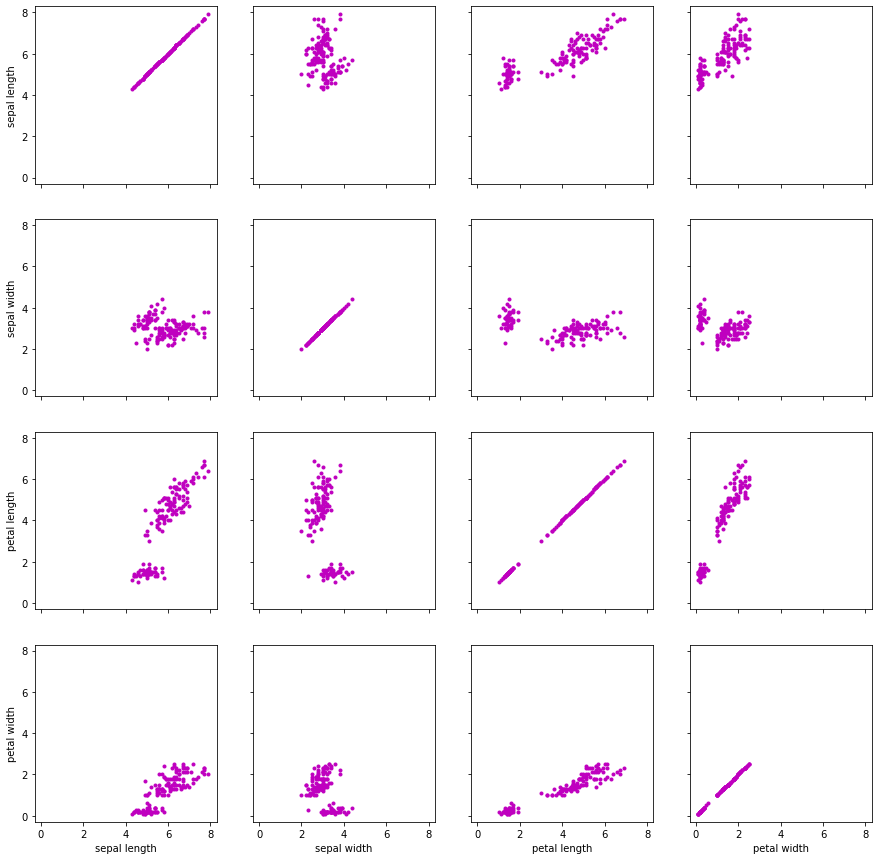

In [11]:
fig, axarr = plt.subplots(4, 4, sharex=True, sharey=True)     # 6 axes, returned as a 2-d array
fig.set_figheight(15)
fig.set_figwidth(15)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i in range(4):
    for j in range(4):
        plt.sca(axarr[i, j])                        # set the current axes instance 
        axarr[i, j].plot(data_x[:, j], data_x[:, i], marker='.', linestyle='', color='m') # plot 

# set labels
for i in range(4):
    for j in range(4):
        plt.setp(axarr[-1, i], xlabel=features[i])
        plt.setp(axarr[i, 0], ylabel=features[i])

plt.show()

#### Dengan Color-coding untuk Data Target Clustering
Merah untuk 0, hijau untuk 1, biru untuk 2

In [12]:
def color_by_pred(pred):
    if pred == 0:
        return 'r'
    elif pred == 1:
        return 'g'
    elif pred == 2:
        return 'b'
    else:
        return 'k'

In [13]:
def show_plot(prediction):
    fig, axarr = plt.subplots(4, 4, sharex=True, sharey=True)     # 6 axes, returned as a 2-d array
    fig.set_figheight(15)
    fig.set_figwidth(15)

    features = ['sepal length', 'sepal width', 'petal length', 'petal width']

    for i in range(4):
        for j in range(4):
            for k in range(len(data_y)):
                plt.sca(axarr[i, j])                        # set the current axes instance 
                axarr[i, j].plot(data_x[k, j], data_x[k, i], marker='.', linestyle='', color=color_by_pred(prediction[k])) # plot 

    # set labels
    for i in range(4):
        for j in range(4):
            plt.setp(axarr[-1, i], xlabel=features[i])
            plt.setp(axarr[i, 0], ylabel=features[i])

    plt.show()

In [ ]:
show_plot(data_y)

### Plotting Hasil Klasterisasi dengan Algoritma K-means

In [ ]:
show_plot(kmeans_pred)

### Plotting Hasil Klasterisasi dengan Algoritma Agglomerative

In [ ]:
show_plot(agglomerative_pred)